In [4]:
pip install pandas 

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy 

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 10.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 8.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 8.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 1. Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Matplotlib is building the font cache; this may take a moment.


In [6]:
# 2. Load datas 
df= pd.read_csv("/Users/rakadeb/Desktop/Data_Analysis/VNL2023.csv")

In [7]:
# 3. Quick check of the data
print(df.head())
print(df.tail())

                Player    Country  Age  Attack  Block  Serve   Set   Dig  \
0        Ichikawa Yuki      Japan   28   15.80   1.13   1.40  0.07  4.80   
1          Romano Yuri      Italy   26   12.33   1.07   1.47  0.00  3.87   
2     Abdel-Aziz Nimir  Nederland   31   15.33   0.67   2.08  0.00  3.17   
3  Herrera Jaime Jesus       Cuba   28   15.00   0.92   1.75  0.00  3.33   
4        Takahashi Ran      Japan   22   11.53   0.67   1.00  0.07  6.40   

   Receive Position  
0     5.60       OH  
1     0.00       OP  
2     0.25       OP  
3     0.17       OP  
4     5.07       OH  
                          Player   Country  Age  Attack  Block  Serve  Set  \
126               Graven Leonard   Germany   19     0.0    0.0    0.0  0.0   
127                 Balaso Fabio     Italy   28     0.0    0.0    0.0  0.0   
128      Nacsimento Maique Reis     Brazil   26     0.0    0.0    0.0  0.0   
129  Garcia Alvarez Yonder Roman      Cuba   30     0.0    0.0    0.0  0.0   
130              Salp

 Columns observed: player, country, age, attack, block, serve, set, dig, receive, position

In [8]:
print("Shape:", df.shape)

Shape: (131, 10)


Output: (131, 10) → 131 rows and 10 columns

In [9]:
# 4. Summary statistics
print(df.describe())

              Age      Attack       Block       Serve         Set         Dig  \
count  131.000000  131.000000  131.000000  131.000000  131.000000  131.000000   
mean    27.809160    5.642672    0.845573    0.535802    2.192595    3.428397   
std      4.186268    4.256229    0.700896    0.454346    6.031587    2.077823   
min     19.000000    0.000000    0.000000    0.000000    0.000000    0.530000   
25%     25.000000    2.800000    0.370000    0.240000    0.000000    1.920000   
50%     27.000000    5.170000    0.690000    0.420000    0.000000    3.000000   
75%     30.000000    8.600000    1.140000    0.760000    0.000000    4.510000   
max     41.000000   15.800000    4.080000    2.080000   26.890000   11.440000   

          Receive  
count  131.000000  
mean     1.684198  
std      1.989939  
min      0.000000  
25%      0.000000  
50%      0.330000  
75%      3.385000  
max      6.690000  


 age: mean = 27, min = 19, max = 41
 attack: mean = 5.64
 All other columns (block, serve, etc.) have different averages and std devs

In [10]:
# 5. Missing values
print("Missing values:\n", df.isna().sum())

Missing values:
 Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64


 All columns: 0 missing values

In [11]:
# 6. Duplicates
print("Duplicate rows:", df.duplicated().sum())

Duplicate rows: 0


Output: 0 → No duplicates

In [12]:
# 7. Correlation matrix for numeric columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
correlation_matrix = df[numeric_cols].corr()
print(correlation_matrix)

              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


 Notable correlations:
attack ↔ serve ≈ 0.67 (positive correlation)
dig ↔ receive ≈ 0.61
block ↔ attack ≈ 0.45 (moderate)

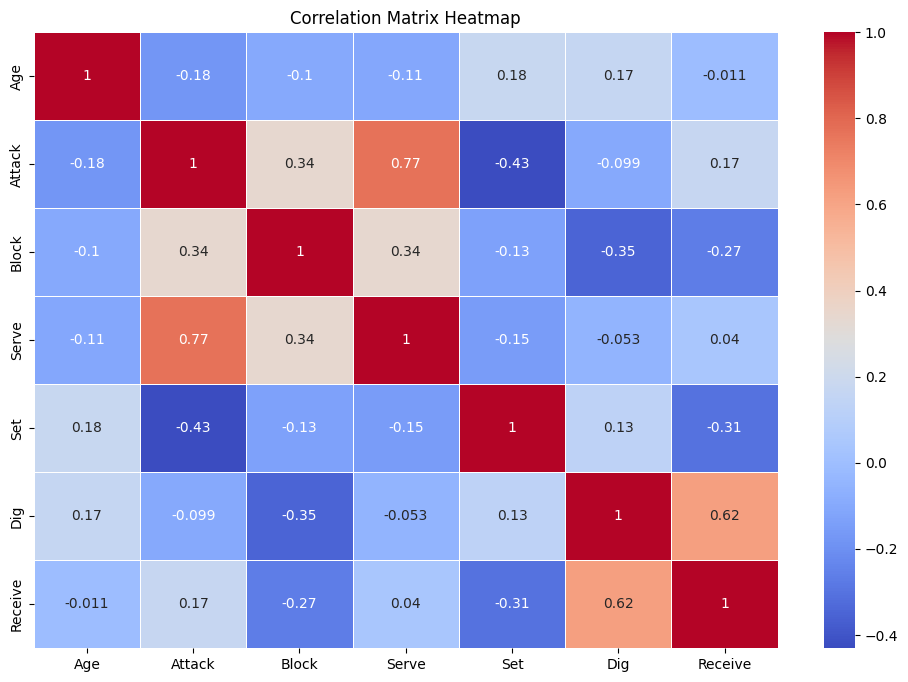

In [13]:
# 8. Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [15]:
print(df.columns.tolist())


['Player', 'Country', 'Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig', 'Receive', 'Position']


In [16]:
# 9. Position distribution (Pie chart)
position_counts = df['Position'].value_counts()
print(position_counts)

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64


# Output: OH (most common), MB (second), OPP, S, L

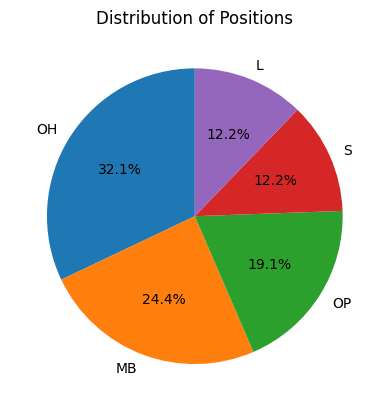

In [19]:
plt.pie(position_counts, labels=position_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Positions")
plt.show()

In [21]:
# 10. Average attack by country (bar chart)
avg_attack = df.groupby('Country')['Attack'].mean().sort_values(ascending=False)
print(avg_attack.head())

Country
France    6.670000
Japan     6.595000
Cuba      6.344286
Serbia    5.998750
Italy     5.965000
Name: Attack, dtype: float64


# Top: France, Japan, Italy
# Bottom: USA

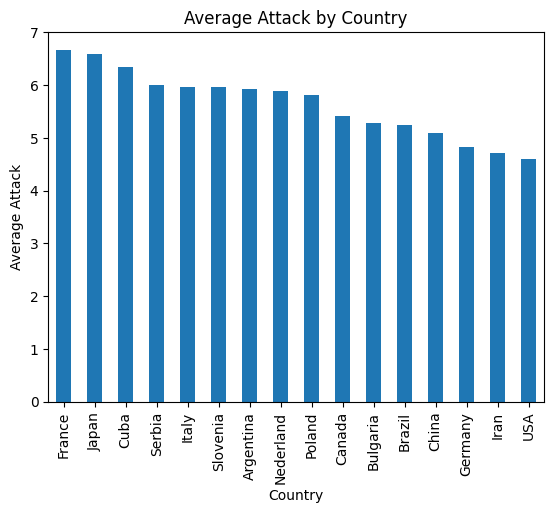

In [26]:
avg_attack.plot(kind='bar')
plt.title("Average Attack by Country")
plt.xlabel("Country")
plt.ylabel("Average Attack")
plt.show()

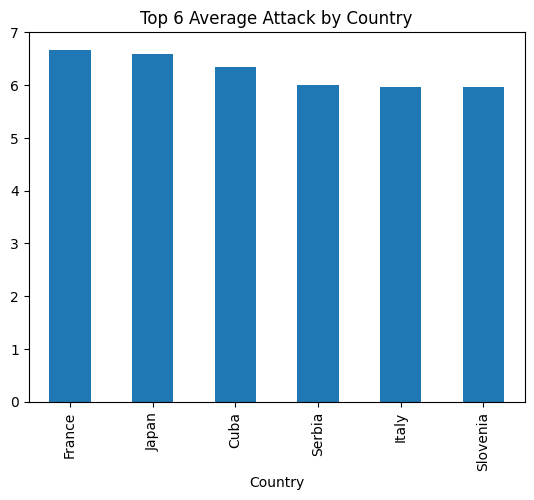

In [27]:
# 11. Top 6 countries by average attack
avg_attack.head(6).plot(kind='bar')
plt.title("Top 6 Average Attack by Country")
plt.show()


In [29]:
# 12. Average serve by age
avg_serve_age = df.groupby('Age')['Serve'].mean().sort_values(ascending=False)
print(avg_serve_age)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64


Age 41 has serve value 0 → likely very few players

In [31]:
# 13. Max attack by country and position
max_attack = df.groupby(['Country', 'Position'])['Attack'].max().reset_index()
print(max_attack.sort_values(by='Attack', ascending=False).head(20))

      Country Position  Attack
52      Japan       OH   15.80
58  Nederland       OP   15.33
33     France       OP   15.25
28       Cuba       OP   15.00
68     Serbia       OP   14.33
12   Bulgaria       OH   14.25
22      China       OH   13.50
72   Slovenia       OH   12.62
8      Brazil       OP   12.46
48      Italy       OP   12.33
27       Cuba       OH   12.33
43       Iran       OP   12.00
7      Brazil       OH   11.85
2   Argentina       OH   11.62
62     Poland       OH   10.57
63     Poland       OP   10.57
47      Italy       OH   10.45
38    Germany       OP   10.42
17     Canada       OH    9.75
32     France       OH    9.56


# Japan OH had highest attack
# Netherlands OH followed next

In [33]:
# 14. Total dig by country
total_dig = df.groupby('Country')['Dig'].sum()
print(total_dig)

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64


USA had relatively high total digs

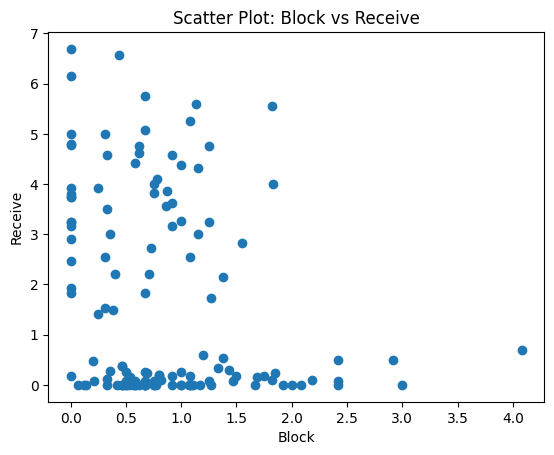

In [35]:
# 15. Scatter plot between block and receive
df.rename(columns=lambda x: x.strip(), inplace=True)  # fix space in "receive"
plt.scatter(df['Block'], df['Receive'])
plt.title("Scatter Plot: Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

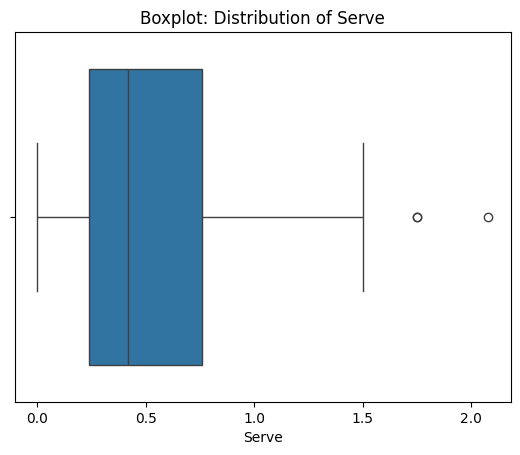

In [37]:
# 16. Boxplot for serve values
sns.boxplot(x=df['Serve'])
plt.title("Boxplot: Distribution of Serve")
plt.xlabel("Serve")
plt.show()

 Most serve values are between 0 and 8 with some outliers

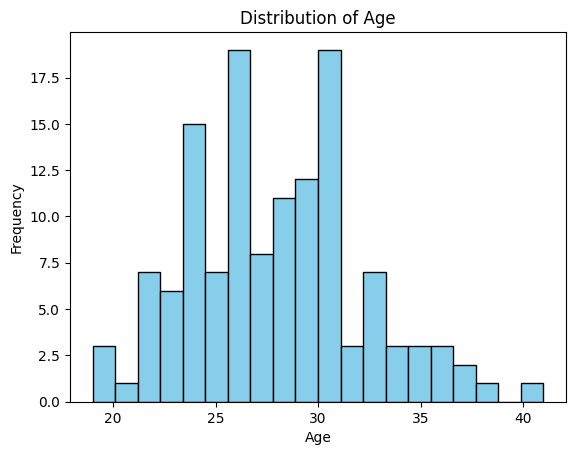

In [39]:
# 17. Histogram of age
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Most players are in age group 23–30

In [40]:
# 18. Bar chart: Average attack by position
avg_attack_pos = df.groupby('Position')['Attack'].mean().sort_values(ascending=True)
print(avg_attack_pos)

Position
L     0.000000
S     0.536250
MB    4.544688
OH    8.381667
OP    9.326000
Name: Attack, dtype: float64


MB has lowest average attack, OPP has highest

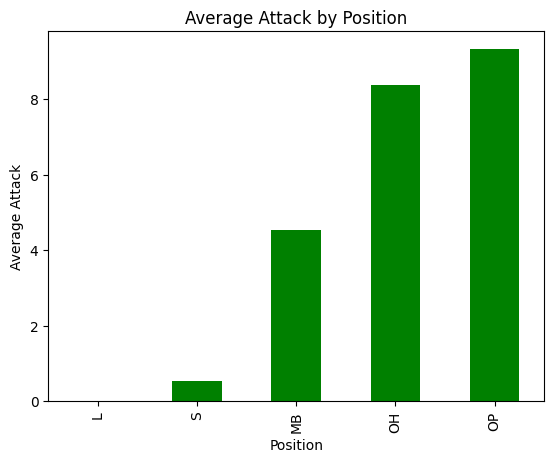

In [41]:
avg_attack_pos.plot(kind='bar', color='green')
plt.title("Average Attack by Position")
plt.xlabel("Position")
plt.ylabel("Average Attack")
plt.show()

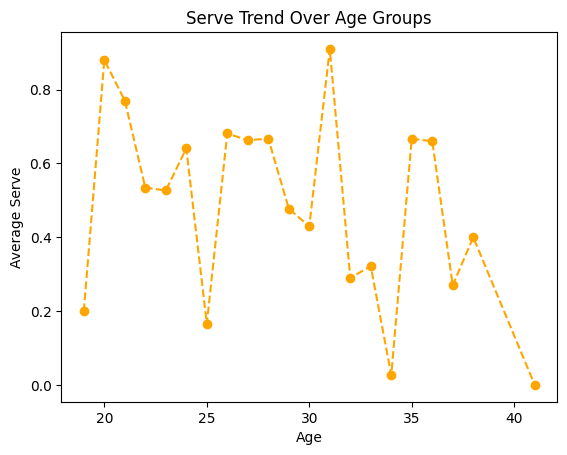

In [43]:
# 19. Line plot: Serve trend over age
serve_trend = df.groupby('Age')['Serve'].mean()
serve_trend.plot(kind='line', marker='o', linestyle='--', color='orange')
plt.title("Serve Trend Over Age Groups")
plt.xlabel("Age")
plt.ylabel("Average Serve")
plt.show()

Serve value gradually decreases after age 30

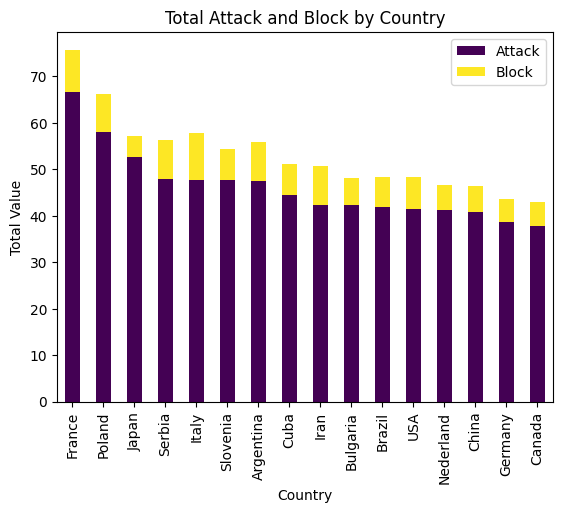

In [45]:
# 20. Stacked bar chart: Total attack and block by country
total_attack_block = df.groupby('Country')[['Attack', 'Block']].sum()
total_attack_block = total_attack_block.sort_values(by='Attack', ascending=False)

total_attack_block.plot(
    kind='bar',
    stacked=True,
    colormap='viridis'
)
plt.title("Total Attack and Block by Country")
plt.xlabel("Country")
plt.ylabel("Total Value")
plt.show()

 France and Japan had high total attack and block values